In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (6).json


{'kaggle.json': b'{"username":"atifalimd","key":"02b78047d307e8639d3f15894b83d04c"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
% matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df_train=pd.read_csv('train.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test=pd.read_csv('test.csv')

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
[i for i in df_train.columns if i not in df_test.columns]

['SalePrice']

There is only column 'SalePrice' additional in df_train comapre to df_test.
It is however going to be output column

In [ ]:
[i for i in df_test.columns if i not in df_train.columns]

[]

In [ ]:
df_train=df_train.drop(columns=['Id'])

In [ ]:
df_train_num=df_train.select_dtypes(exclude='object')

In [ ]:
df_train_num.shape

(1460, 37)

In [ ]:
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
num_train_col=df_train_num.columns

In [ ]:
num_train_col=num_train_col.tolist()

remove columns with low variance because it will not help model in finding any patterns

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
sel=VarianceThreshold(threshold=0.05)

In [ ]:
sel.fit(df_train_num.iloc[:, :-1])

VarianceThreshold(threshold=0.05)

In [ ]:
sum(sel.get_support())

35

In [ ]:
(len(df_train_num.iloc[:,:-1].columns))-(sel.get_support().sum())

1

In [ ]:
low_var_col=[i for i in df_train_num.iloc[:,:-1].columns if i not in df_train_num.iloc[:,:-1].columns[sel.get_support()]]

In [ ]:
low_var_col

['KitchenAbvGr']

have to drop all the low variance columns 

In [ ]:
df_train_num=df_train_num.drop(columns=low_var_col)

In [ ]:
len(df_train_num.columns)

36

Plot the distribution of all the numerical data

In [ ]:
df_train_num.shape

(1460, 36)

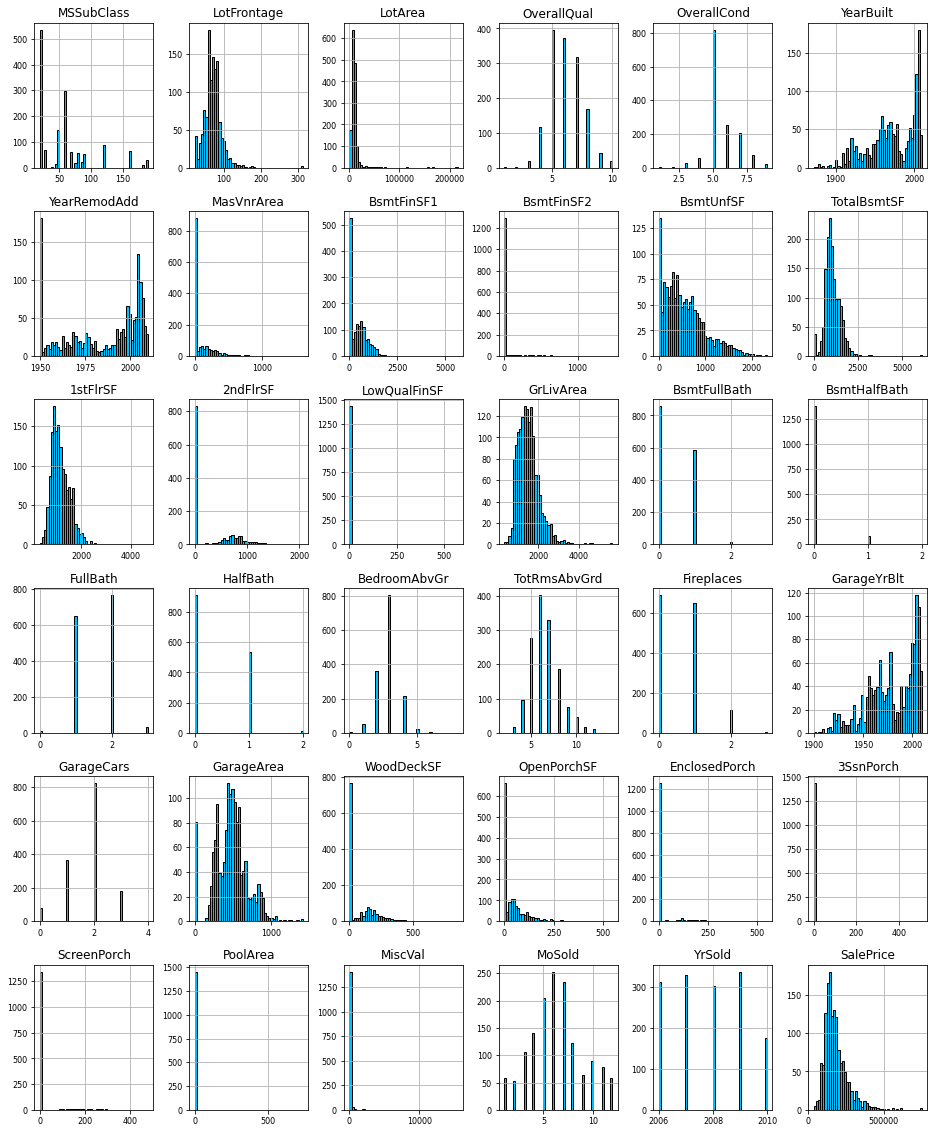

In [ ]:
fig=df_train_num.hist(figsize=(16,20),bins=50,
                      color="deepskyblue",edgecolor="black", xlabelsize=8, ylabelsize=8)

Correlation for numerical columns including salesprice

In [ ]:
corr=df_train_num.corr()

In [ ]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Converting all the columns of correlation value less than 0.3 to 0,bcoz they are not that much helpful and can cause problem of visibility of values.

In [ ]:
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
corr[(corr<0.3) & (corr>-0.3)]=0

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

In [ ]:
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

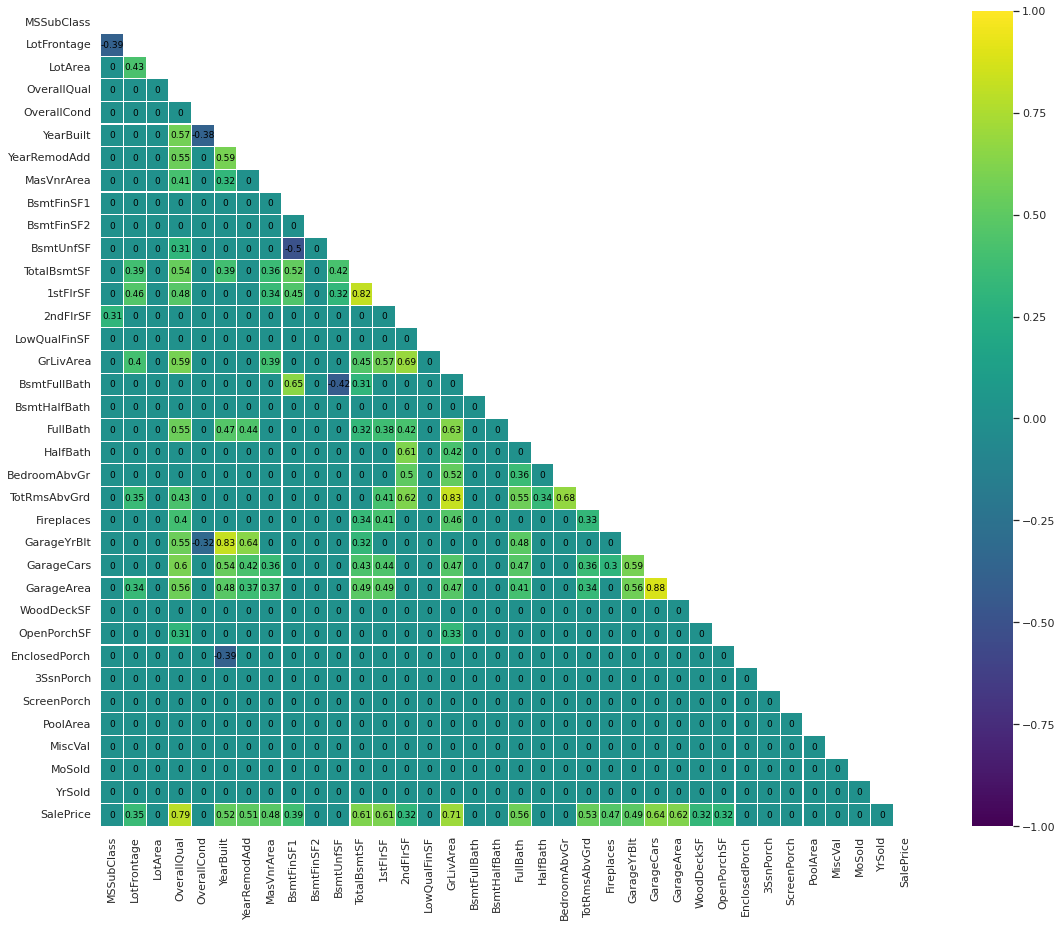

In [ ]:
sns.heatmap(corr, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap='viridis', annot=True)
plt.show()

selecting features with higher correlation with salesprice.
removing salesprice from correlation bcoz we have to use it as a reference

In [ ]:
df_num_corr=df_train_num.corr()['SalePrice'][:-1]

In [ ]:
high_corr_feat=df_num_corr[abs(df_num_corr)>=0.5].sort_values(ascending=False)
print(f"{len(high_corr_feat)} highly correlated features with SalesPrice\n")
high_corr_feat

10 highly correlated features with SalesPrice



OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

In [ ]:
mid_corr_feat=df_num_corr[(df_num_corr<0.5) & (df_num_corr>=0.3)].sort_values(ascending=False)
print(f"{len(mid_corr_feat)} moderately correlated features with SalesPrice\n")
mid_corr_feat

8 moderately correlated features with SalesPrice



GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64

In [ ]:
high_corr_feat_col=high_corr_feat.index.tolist()
high_corr_feat_col.append('SalePrice')
high_corr_feat_col

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice']

In [ ]:
df_high_corr=df_train_num[high_corr_feat_col]
# or df_train_num.loc[:, high_corr_feat_col]

In [ ]:
df_train_num.shape

(1460, 36)

Plot will help in finding outliers and distribution

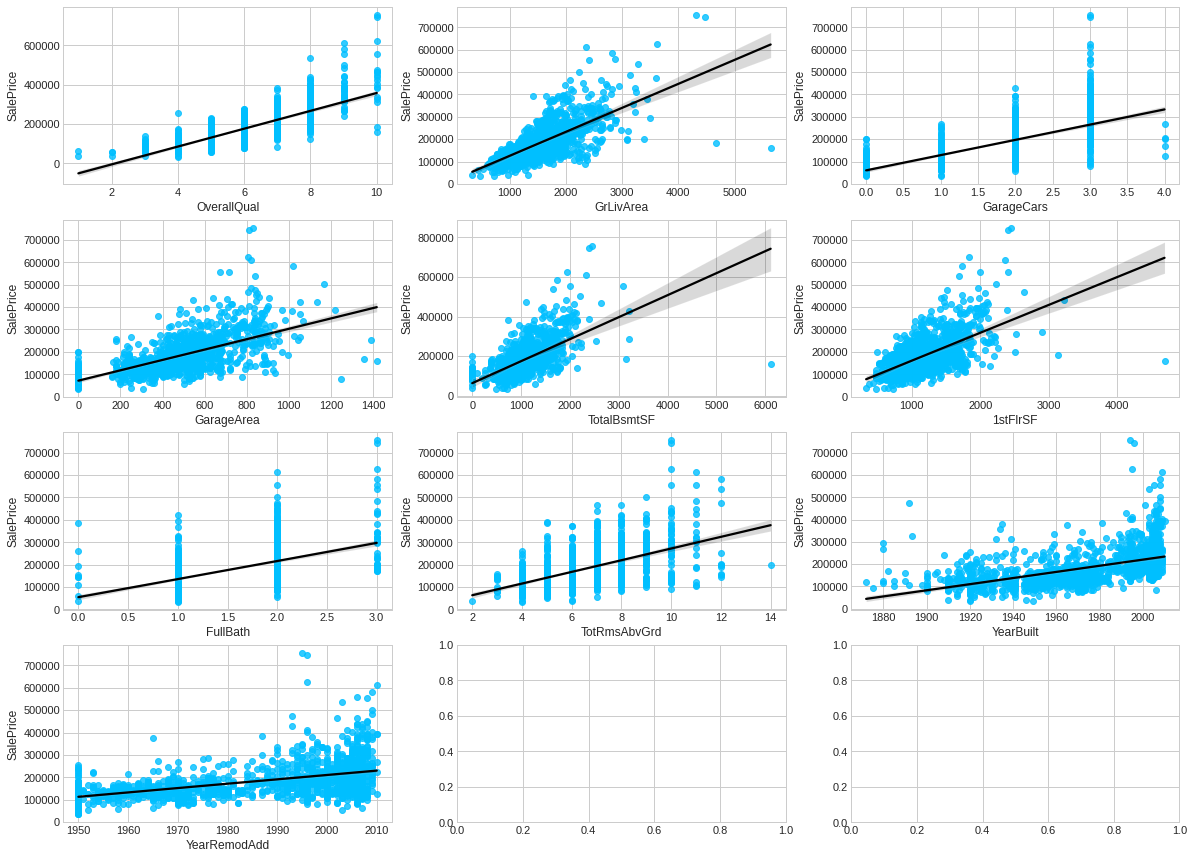

In [ ]:
plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(high_corr_feat_col) / 3), 3)
for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(high_corr_feat_col)-1:
      sns.regplot(x=high_corr_feat_col[i], y="SalePrice", data=df_high_corr,
        ax=ax, scatter_kws={"color": "deepskyblue"},line_kws={"color": "black"})

In [ ]:
mid_corr_feat_col=mid_corr_feat.index.tolist()
mid_corr_feat_col.append('SalePrice')
mid_corr_feat_col

['GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'SalePrice']

In [ ]:
df_mid_corr=df_train_num.loc[:,mid_corr_feat_col]

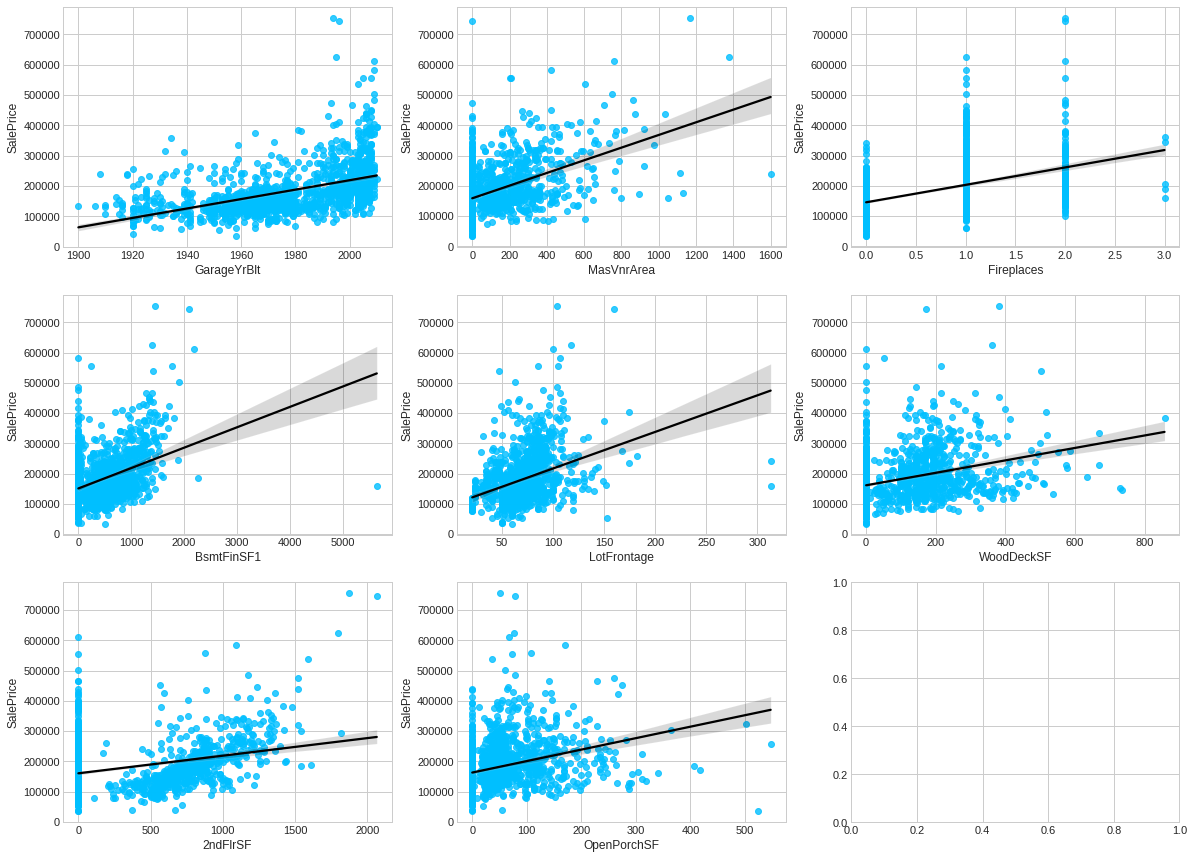

In [ ]:
plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(mid_corr_feat_col) / 3), 3)
for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(mid_corr_feat_col)-1:
      sns.regplot(x=mid_corr_feat_col[i], y="SalePrice", data=df_mid_corr,
        ax=ax, scatter_kws={"color": "deepskyblue"},line_kws={"color": "black"})

Remove SalesPrice from one of the list by slicing.
These are the final columns of the dataset.

In [ ]:
list_final_feat=high_corr_feat_col[:-1]+mid_corr_feat_col

In [ ]:
list_final_feat

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'SalePrice']

In [ ]:
df_train_num=df_train_num.loc[:,list_final_feat]
df_train_num.shape

(1460, 19)

In [ ]:
df_test_num=df_test.loc[:,list_final_feat[:-1]]

In [ ]:
df_train_num.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
SalePrice         0
dtype: int64

In [ ]:
df_train_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,"2,003.00",196.00,0,706,65.00,0,854,61,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,"1,976.00",0.00,1,978,80.00,298,0,0,181500
2,7,1786,2,608,920,920,2,6,2001,2002,"2,001.00",162.00,1,486,68.00,0,866,42,223500
3,7,1717,3,642,756,961,1,7,1915,1970,"1,998.00",0.00,1,216,60.00,0,756,35,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,"2,000.00",350.00,1,655,84.00,192,1053,84,250000


In [ ]:
df_train_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,"2,003.00",196.00,0,706,65.00,0,854,61,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,"1,976.00",0.00,1,978,80.00,298,0,0,181500
2,7,1786,2,608,920,920,2,6,2001,2002,"2,001.00",162.00,1,486,68.00,0,866,42,223500
3,7,1717,3,642,756,961,1,7,1915,1970,"1,998.00",0.00,1,216,60.00,0,756,35,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,"2,000.00",350.00,1,655,84.00,192,1053,84,250000


In [ ]:
df_train_num.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
SalePrice         0
dtype: int64

In [ ]:
df_train_num['GarageYrBlt_impute']=df_train_num['GarageYrBlt']
df_train_num['MasVnrArea_impute']=df_train_num['MasVnrArea']
df_train_num['LotFrontage_impute']=df_train_num['LotFrontage']

In [ ]:
df_train_num['GarageYrBlt_impute'][df_train_num['GarageYrBlt_impute'].isnull()]=df_train_num['GarageYrBlt'].dropna().sample(df_train_num['GarageYrBlt'].isnull().sum()).values
df_train_num['MasVnrArea_impute'][df_train_num['MasVnrArea_impute'].isnull()]=df_train_num['MasVnrArea'].dropna().sample(df_train_num['MasVnrArea'].isnull().sum()).values
df_train_num['LotFrontage_impute'][df_train_num['LotFrontage_impute'].isnull()]=df_train_num['LotFrontage'].dropna().sample(df_train_num['LotFrontage'].isnull().sum()).values

In [ ]:
df_train_num=df_train_num.drop(columns=['MasVnrArea','LotFrontage','GarageYrBlt'])

In [ ]:
df_train_num=df_train_num.rename(columns={'MasVnrArea_impute':'MasVnrArea','LotFrontage_impute':'LotFrontage','GarageYrBlt_impute':'GarageYrBlt'})

In [ ]:
df_train_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice,GarageYrBlt,MasVnrArea,LotFrontage
0,7,1710,2,548,856,856,2,8,2003,2003,0,706,0,854,61,208500,"2,003.00",196.00,65.00
1,6,1262,2,460,1262,1262,2,6,1976,1976,1,978,298,0,0,181500,"1,976.00",0.00,80.00
2,7,1786,2,608,920,920,2,6,2001,2002,1,486,0,866,42,223500,"2,001.00",162.00,68.00
3,7,1717,3,642,756,961,1,7,1915,1970,1,216,0,756,35,140000,"1,998.00",0.00,60.00
4,8,2198,3,836,1145,1145,2,9,2000,2000,1,655,192,1053,84,250000,"2,000.00",350.00,84.00


In [ ]:
df_test_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,5,896,1.00,730.00,882.00,896,1,5,1961,1961,"1,961.00",0.00,0,468.00,80.00,140,0,0
1,6,1329,1.00,312.00,"1,329.00",1329,1,6,1958,1958,"1,958.00",108.00,0,923.00,81.00,393,0,36
2,5,1629,2.00,482.00,928.00,928,2,6,1997,1998,"1,997.00",0.00,1,791.00,74.00,212,701,34
3,6,1604,2.00,470.00,926.00,926,2,7,1998,1998,"1,998.00",20.00,1,602.00,78.00,360,678,36
4,8,1280,2.00,506.00,"1,280.00",1280,2,5,1992,1992,"1,992.00",0.00,0,263.00,43.00,0,0,82


In [ ]:
df_test_num.isnull().mean()*100

OverallQual     0.00
GrLivArea       0.00
GarageCars      0.07
GarageArea      0.07
TotalBsmtSF     0.07
1stFlrSF        0.00
FullBath        0.00
TotRmsAbvGrd    0.00
YearBuilt       0.00
YearRemodAdd    0.00
GarageYrBlt     5.35
MasVnrArea      1.03
Fireplaces      0.00
BsmtFinSF1      0.07
LotFrontage    15.56
WoodDeckSF      0.00
2ndFlrSF        0.00
OpenPorchSF     0.00
dtype: float64

In [ ]:
df_test_num['GarageCars']=df_test_num['GarageCars'].fillna(df_test_num['GarageCars'].mode()[0])

In [ ]:
df_test_num['GarageArea']=df_test_num['GarageArea'].fillna(df_test_num['GarageArea'].mode()[0])

In [ ]:
df_test_num['TotalBsmtSF']=df_test_num['TotalBsmtSF'].fillna(df_test_num['TotalBsmtSF'].mode()[0])

In [ ]:
df_test_num['BsmtFinSF1']=df_test_num['BsmtFinSF1'].fillna(df_test_num['BsmtFinSF1'].mode()[0])

In [ ]:
df_test_num['GarageYrBlt_impute']=df_test_num['GarageYrBlt']

In [ ]:
df_test_num['MasVnrArea_impute']=df_test_num['MasVnrArea']

In [ ]:
df_test_num.isnull().mean()*100

OverallQual           0.00
GrLivArea             0.00
GarageCars            0.00
GarageArea            0.00
TotalBsmtSF           0.00
1stFlrSF              0.00
FullBath              0.00
TotRmsAbvGrd          0.00
YearBuilt             0.00
YearRemodAdd          0.00
GarageYrBlt           5.35
MasVnrArea            1.03
Fireplaces            0.00
BsmtFinSF1            0.00
LotFrontage          15.56
WoodDeckSF            0.00
2ndFlrSF              0.00
OpenPorchSF           0.00
GarageYrBlt_impute    5.35
MasVnrArea_impute     1.03
dtype: float64

In [ ]:
df_test_num['GarageYrBlt_impute']=df_test_num['GarageYrBlt']

In [ ]:
df_test_num['MasVnrArea_impute']=df_test_num['MasVnrArea']

In [ ]:
df_test_num['LotFrontage_impute']=df_test_num['LotFrontage']

In [ ]:
df_test_num['MasVnrArea_impute'][df_test_num['MasVnrArea_impute'].isnull()]=df_test_num['MasVnrArea'].dropna().sample(df_test_num['MasVnrArea'].isnull().sum()).values

In [ ]:
df_test_num['LotFrontage_impute'][df_test_num['LotFrontage_impute'].isnull()]=df_test_num['LotFrontage'].dropna().sample(df_test_num['LotFrontage'].isnull().sum()).values

In [ ]:
df_test_num['GarageYrBlt_impute'][df_test_num['GarageYrBlt_impute'].isnull()]=df_test_num['GarageYrBlt'].dropna().sample(df_test_num['GarageYrBlt'].isnull().sum()).values

In [ ]:
df_test_num=df_test_num.drop(columns=['GarageYrBlt','MasVnrArea','LotFrontage'])

In [ ]:
df_test_num=df_test_num.rename(columns={'MasVnrArea_impute':'MasVnrArea','LotFrontage_impute':'LotFrontage','GarageYrBlt_impute':'GarageYrBlt'})

In [ ]:
df_test_num.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
BsmtFinSF1      0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
GarageYrBlt     0
MasVnrArea      0
LotFrontage     0
dtype: int64

In [ ]:
df_train_cat=df_train.select_dtypes(include='object')

In [ ]:
cat_col=df_train.select_dtypes(include='object').columns.tolist()

In [ ]:
cat_col.append('SalePrice')

In [ ]:
df_train_cat=df_train[cat_col]
df_train_cat.shape

(1460, 44)

In [ ]:
df_test_cat=df_test[cat_col[:-1]]

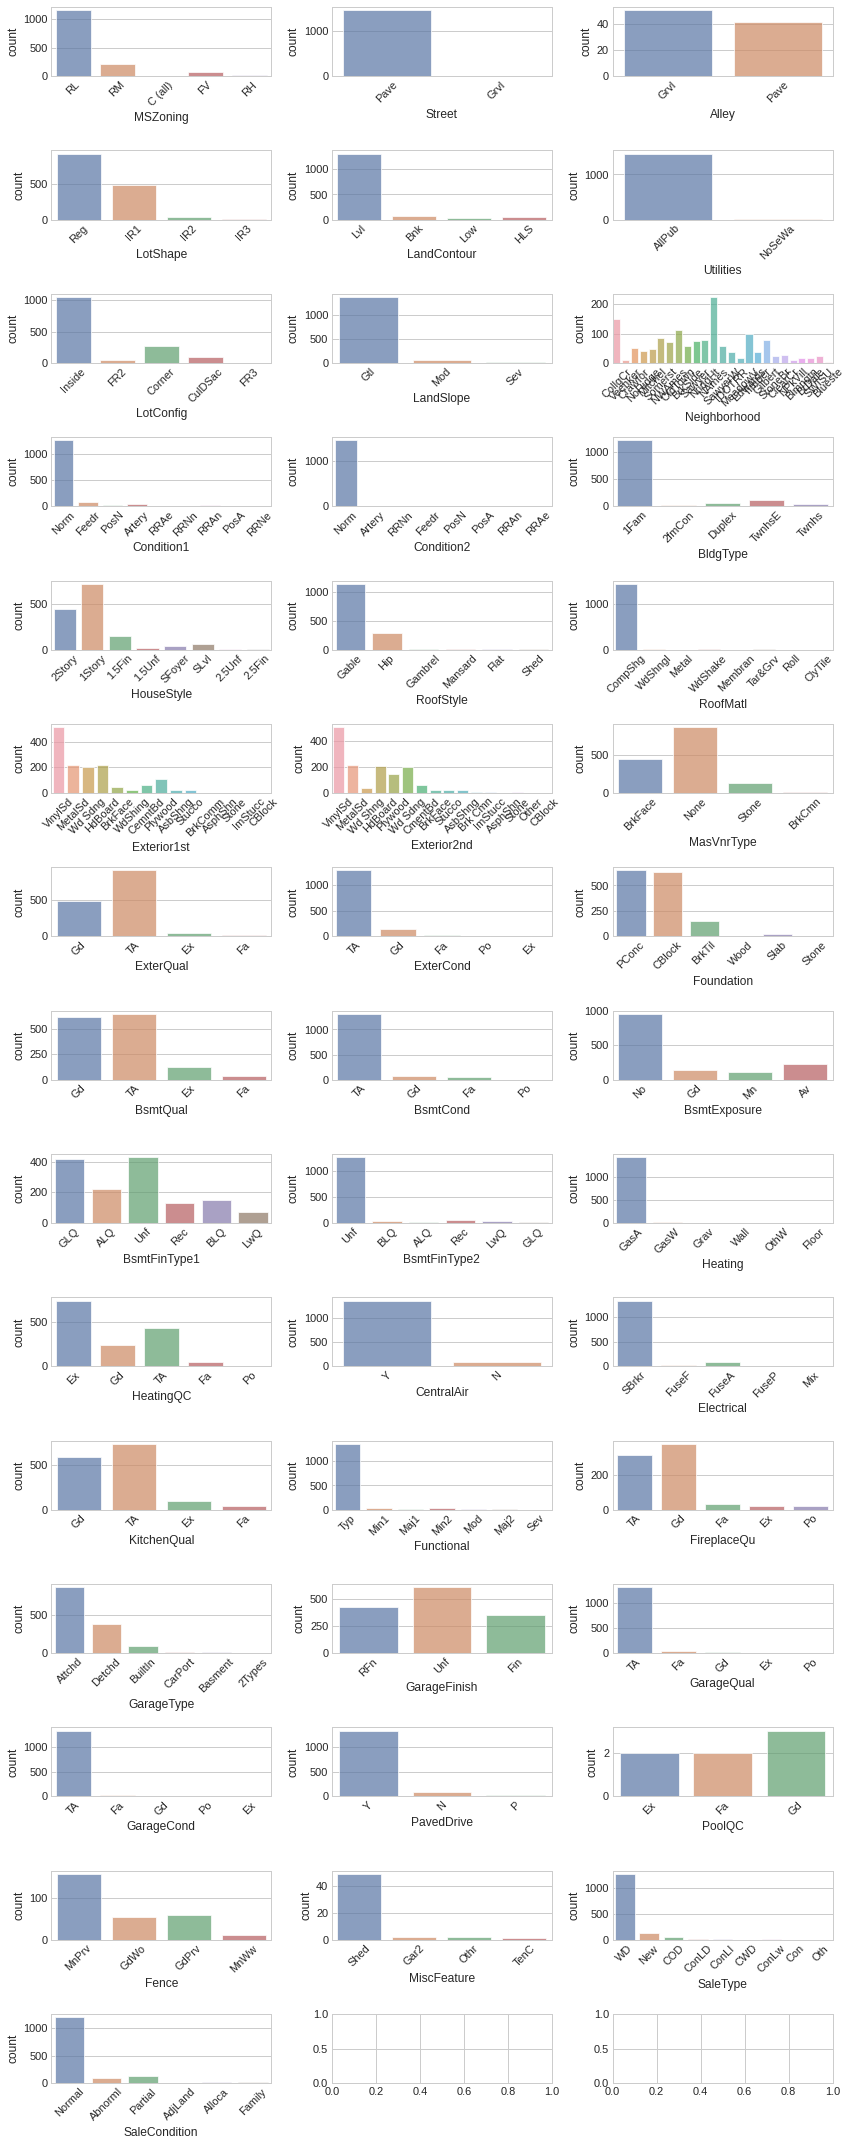

In [ ]:
fig, axes = plt.subplots(
    round(len(df_train_cat.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=df_train_cat.columns[i], alpha=0.7, data=df_train_cat, ax=ax)

fig.tight_layout()

In [ ]:
drop_cat_cols=["Street",
    "Alley",
    "LandContour",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "CentralAir",
    "GarageQual",
    "GarageCond",
    "SaleType",
    "PavedDrive",
    "LandContour",
    "ExterCond",
    "GarageCond",
    "Heating",
    "MiscFeature",
    "BsmtFinType2",
    "Functional",
    "GarageQual",
    "GarageCond"
    ]

In [ ]:
df_train_cat=df_train_cat.drop(columns=drop_cat_cols)

In [ ]:
df_train_cat.head()

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,SaleCondition,SalePrice
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Ex,SBrkr,Gd,NaN,Attchd,RFn,NaN,NaN,Normal,208500
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,...,Ex,SBrkr,TA,TA,Attchd,RFn,NaN,NaN,Normal,181500
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Ex,SBrkr,Gd,TA,Attchd,RFn,NaN,NaN,Normal,223500
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,...,Gd,SBrkr,Gd,Gd,Detchd,Unf,NaN,NaN,Abnorml,140000
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Ex,SBrkr,Gd,TA,Attchd,RFn,NaN,NaN,Normal,250000


In [ ]:
df_test_cat=df_test_cat.drop(columns=drop_cat_cols)

In [ ]:
df_test_cat.head()

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,BsmtFinType1,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,SaleCondition
0,RH,Reg,Inside,NAmes,Feedr,1Fam,1Story,Gable,VinylSd,VinylSd,...,Rec,TA,SBrkr,TA,NaN,Attchd,Unf,NaN,MnPrv,Normal
1,RL,IR1,Corner,NAmes,Norm,1Fam,1Story,Hip,Wd Sdng,Wd Sdng,...,ALQ,TA,SBrkr,Gd,NaN,Attchd,Unf,NaN,NaN,Normal
2,RL,IR1,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,GLQ,Gd,SBrkr,TA,TA,Attchd,Fin,NaN,MnPrv,Normal
3,RL,IR1,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,GLQ,Ex,SBrkr,Gd,Gd,Attchd,Fin,NaN,NaN,Normal
4,RL,IR1,Inside,StoneBr,Norm,TwnhsE,1Story,Gable,HdBoard,HdBoard,...,ALQ,Ex,SBrkr,Gd,NaN,Attchd,RFn,NaN,NaN,Normal


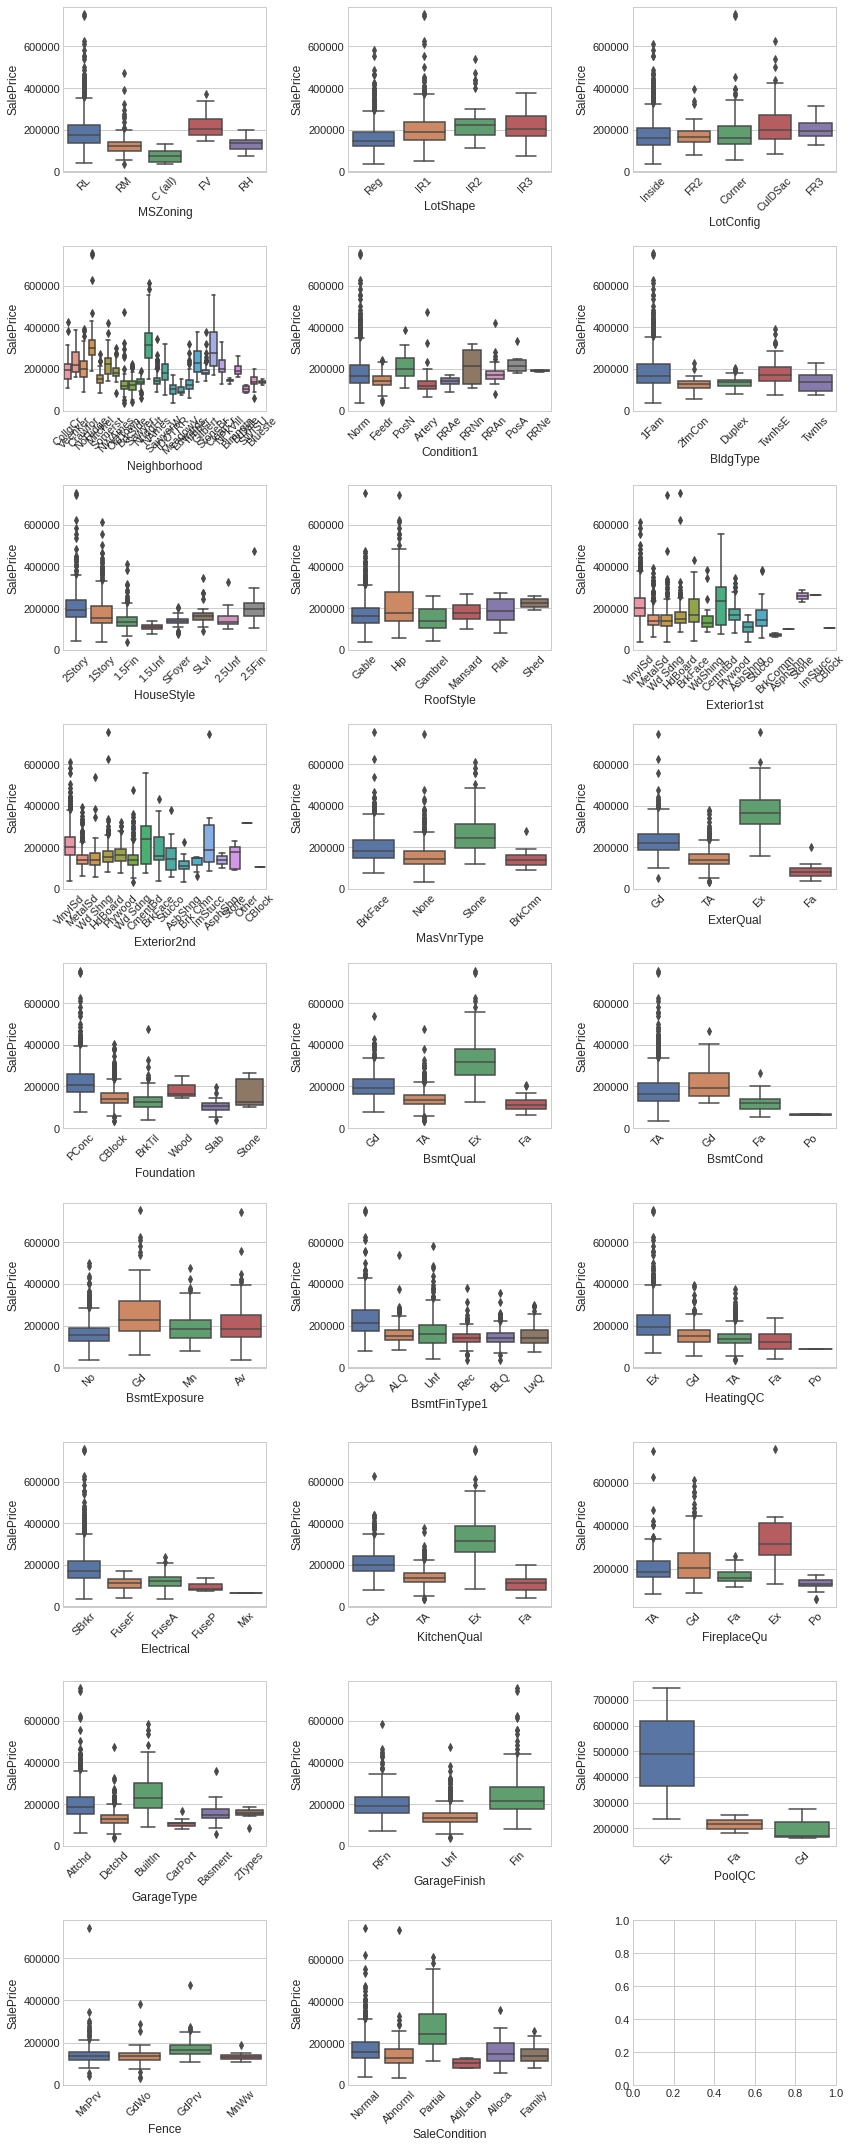

In [ ]:
fig, axes = plt.subplots(
    round(len(df_train_cat.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
  # plot the variation of SalePrice in each feature
    if i < len(df_train_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(
            x=df_train_cat.columns[i], y="SalePrice", data=df_train_cat, ax=ax)
fig.tight_layout()

In [ ]:
from scipy.stats import chi2_contingency

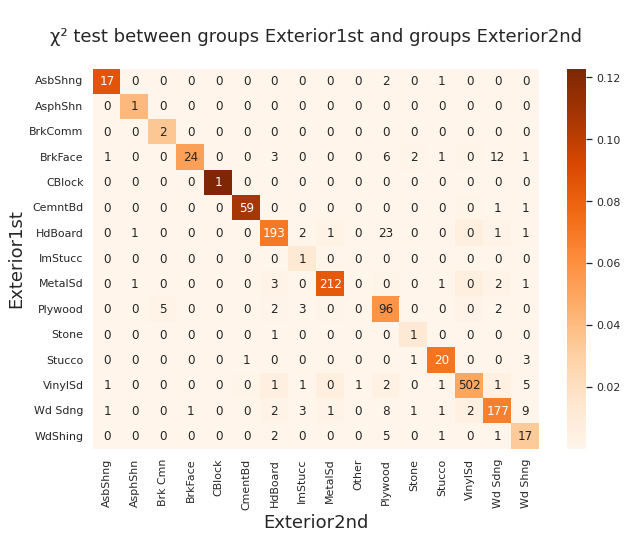

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0



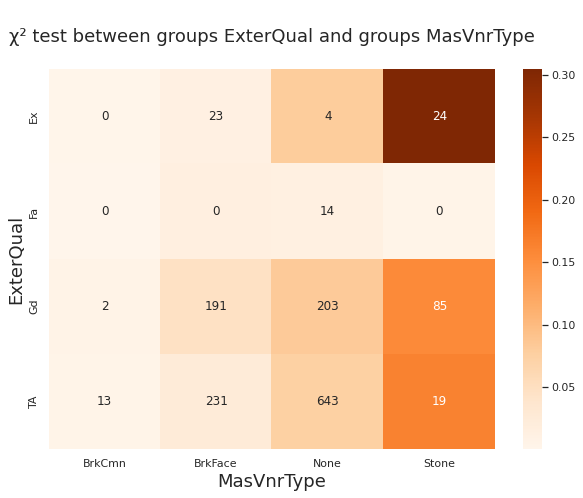

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54



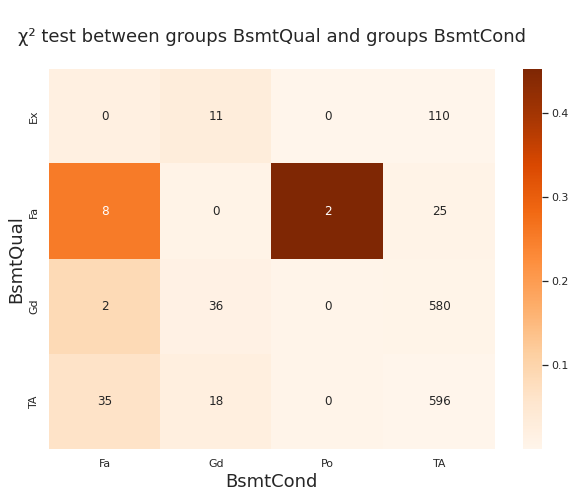

P-Value of the ChiSq Test bewteen BsmtQual and BsmtCond is: 1.9371809126533347e-31



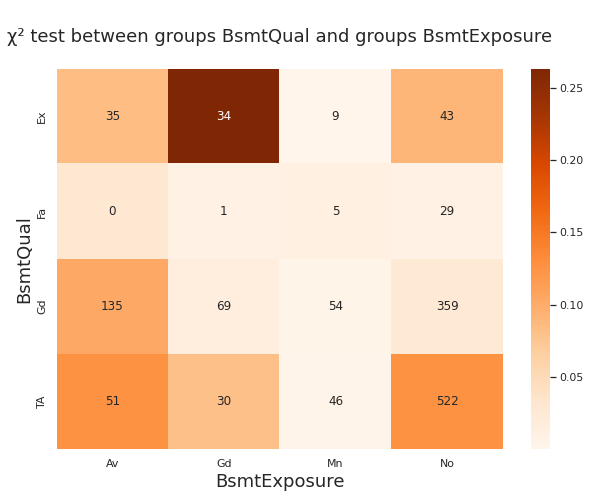

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual", "BsmtQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtCond", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_cat[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_cat)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_cat[i], columns=df_train_cat[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

In [ ]:
df_train_cat.drop(Y, axis=1, inplace=True)
df_test_cat.drop(Y, axis=1, inplace=True)

In [ ]:
df_train_num.shape,df_test_num.shape

((1460, 19), (1459, 18))

In [ ]:
df_train_cat.shape,df_test_cat.shape

((1460, 23), (1459, 22))

In [ ]:
column_with_nan = df_train_cat.columns[df_train_cat.isnull().any()]
column_name = []
percent_nan = []
for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_cat[i].isnull().mean() * 100,2))
tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)

Text(0, 0.5, 'Column Name\n')

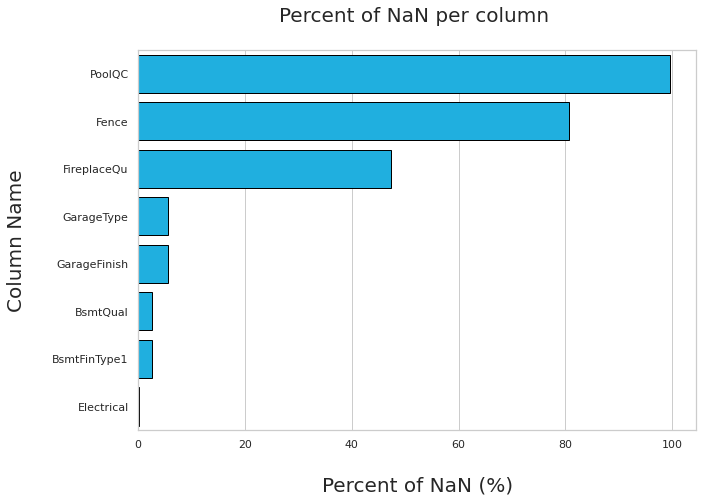

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column \n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
df_train_cat=df_train_cat.drop(columns=(['PoolQC','Fence']))

In [ ]:
df_train_cat=df_train_cat.drop(columns=['FireplaceQu'])

In [ ]:
def fillrandom_nan(df,col_impute,col):
  df[col_impute][df[col_impute].isnull()]=df[col_impute].dropna().sample(df[col_impute].isnull().sum()).values

In [ ]:
df_train_cat.shape

(1460, 20)

In [ ]:
df_train_cat['GarageType_impute']=df_train_cat['GarageType']
df_train_cat['GarageFinish_impute']=df_train_cat['GarageFinish']
df_train_cat['BsmtQual_impute']=df_train_cat['BsmtQual']
df_train_cat['BsmtFinType1_impute']=df_train_cat['BsmtFinType1']
df_train_cat['Electrical_impute']=df_train_cat['Electrical']

In [ ]:
fillrandom_nan(df_train_cat,'GarageType_impute','GarageType')
fillrandom_nan(df_train_cat,'GarageFinish_impute','GarageFinish')
fillrandom_nan(df_train_cat,'BsmtQual_impute','BsmtQual')
fillrandom_nan(df_train_cat,'BsmtFinType1_impute','BsmtFinType1')
fillrandom_nan(df_train_cat,'Electrical_impute','Electrical')

<Figure size 216x216 with 0 Axes>

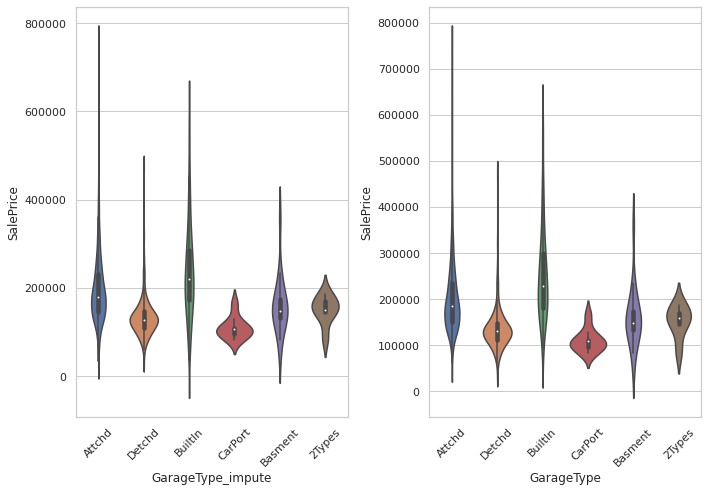

In [ ]:
labels=df_train_cat['GarageType_impute'].unique().tolist()
plt.figure(figsize=[3,3])
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.violinplot(x=df_train_cat['GarageType_impute'],y=df_train_cat['SalePrice'],ax=ax1)
sns.violinplot(x=df_train_cat['GarageType'],y=df_train_cat['SalePrice'],ax=ax2)
ax1.set_xticklabels(labels,rotation=45)
ax2.set_xticklabels(labels,rotation=45)
fig.tight_layout()
plt.show()

In [ ]:
def violin_plot(df,col_impute,col):
  labels=df[col_impute].unique().tolist()
  plt.figure(figsize=(3,3))
  fig, (ax1, ax2) = plt.subplots(1, 2)
  sns.violinplot(x=df[col_impute],y=df['SalePrice'],ax=ax1)
  sns.violinplot(x=df[col],y=df['SalePrice'],ax=ax2)
  ax1.set_xticklabels(labels,rotation=45)
  ax2.set_xticklabels(labels,rotation=45)
  fig.tight_layout()
  plt.show()

<Figure size 216x216 with 0 Axes>

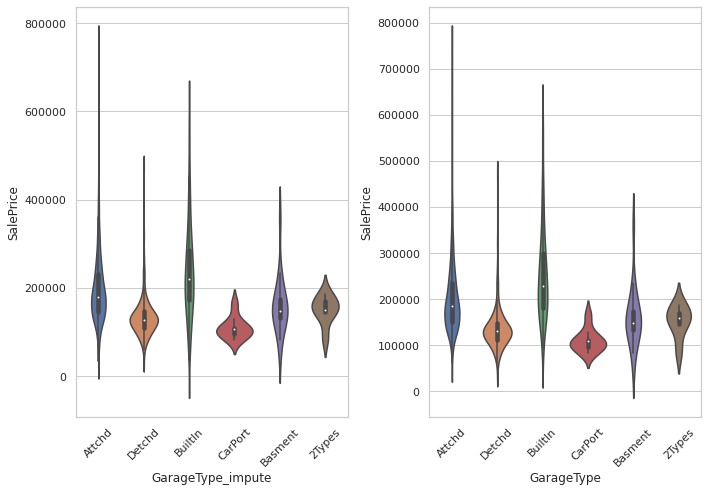

In [ ]:
violin_plot(df_train_cat,'GarageType_impute','GarageType')

<Figure size 216x216 with 0 Axes>

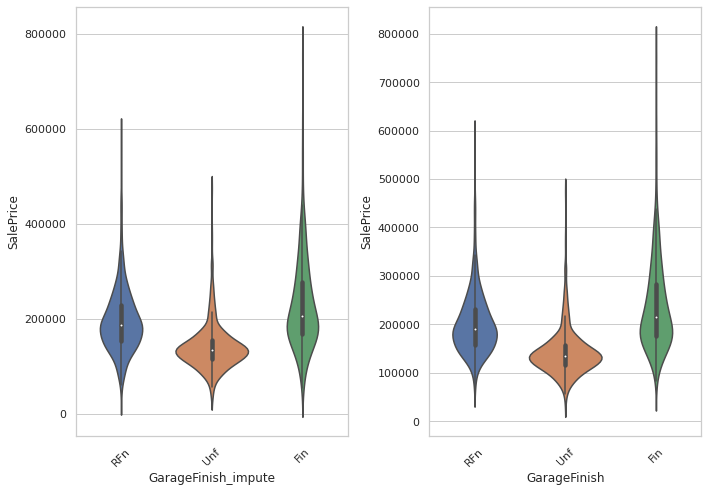

In [ ]:
violin_plot(df_train_cat,'GarageFinish_impute','GarageFinish')

<Figure size 216x216 with 0 Axes>

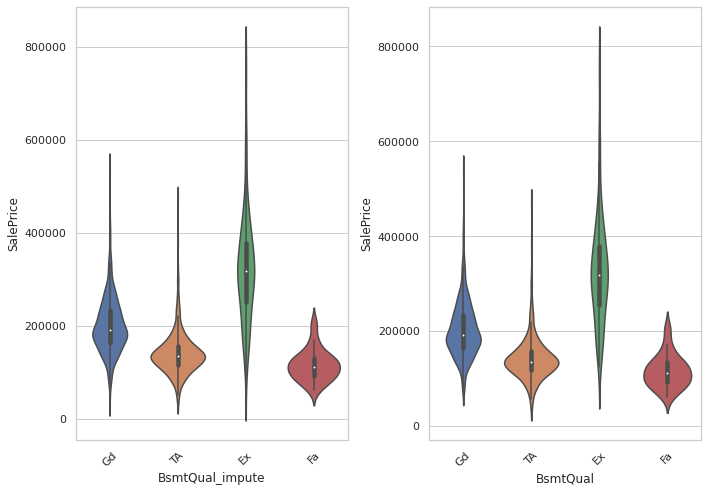

In [ ]:
violin_plot(df_train_cat,'BsmtQual_impute','BsmtQual')

<Figure size 216x216 with 0 Axes>

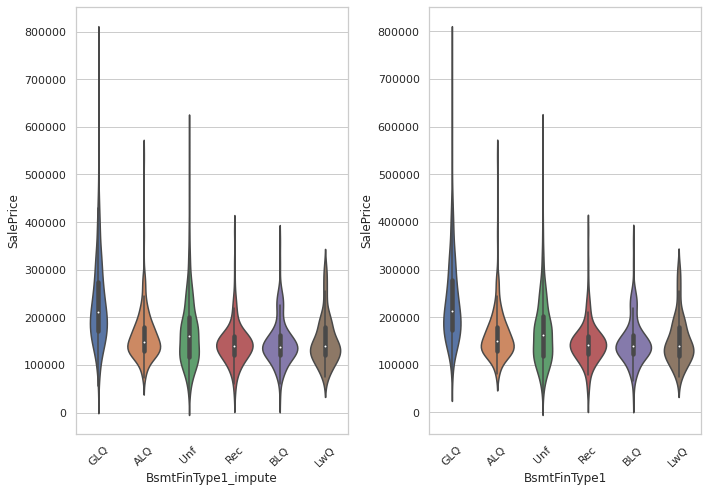

In [ ]:
violin_plot(df_train_cat,'BsmtFinType1_impute','BsmtFinType1')

<Figure size 216x216 with 0 Axes>

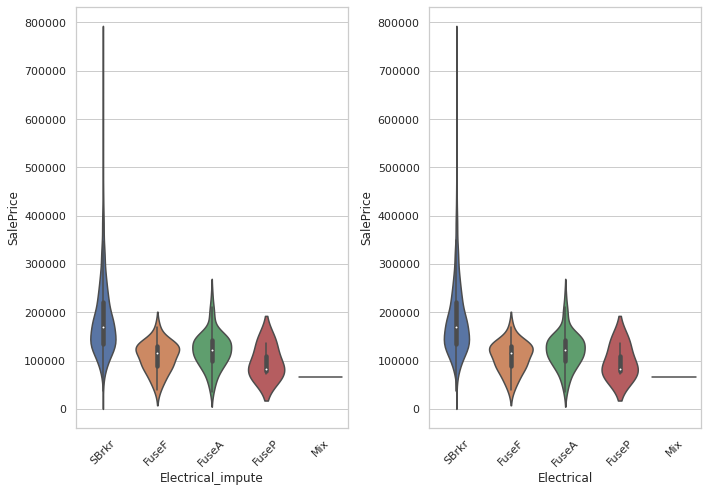

In [ ]:
violin_plot(df_train_cat,'Electrical_impute','Electrical')

In [ ]:
df_test_cat=df_test_cat.drop(columns=['PoolQC','Fence','FireplaceQu'])

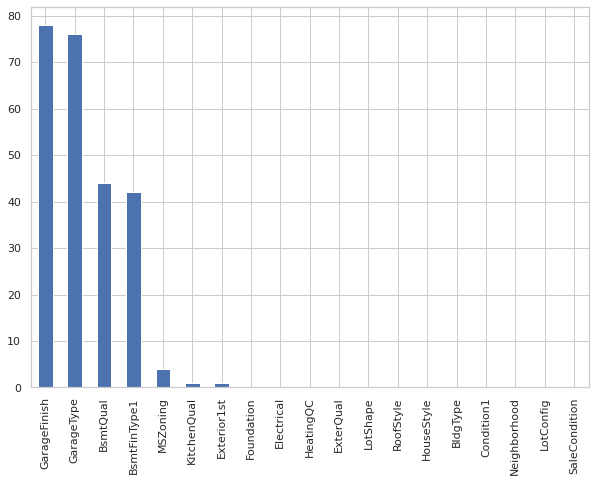

In [ ]:
df_test_cat.isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [ ]:
df_test_cat['MSZoning_impute']=df_test_cat['MSZoning']
df_test_cat['Exterior1st_impute']=df_test_cat['Exterior1st']
df_test_cat['BsmtQual_impute']=df_test_cat['BsmtQual']
df_test_cat['BsmtFinType1_impute']=df_test_cat['BsmtFinType1']
df_test_cat['KitchenQual_impute']=df_test_cat['KitchenQual']
df_test_cat['GarageType_impute']=df_test_cat['GarageType']
df_test_cat['GarageFinish_impute']=df_test_cat['GarageFinish']


Text(0, 0.5, 'Column Name\n')

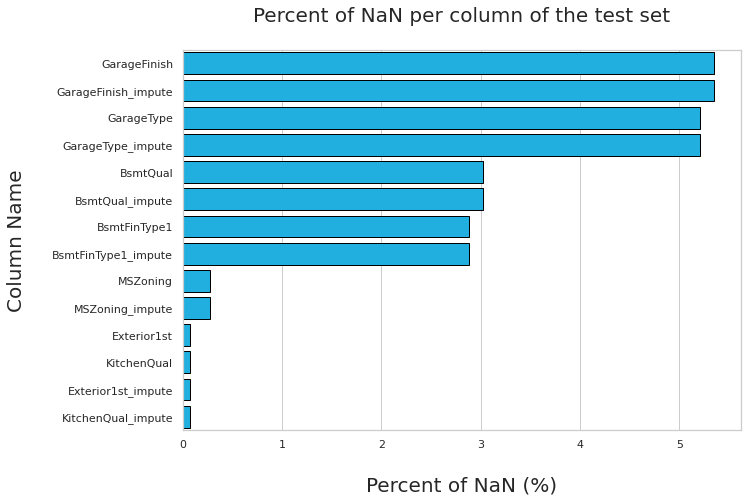

In [ ]:
column_with_nan = df_test_cat.columns[df_test_cat.isnull().any()]
column_name = []
percent_nan = []
for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_cat[i].isnull().mean() * 100,2))
tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
fillrandom_nan(df_test_cat,'MSZoning_impute','MSZoning')
fillrandom_nan(df_test_cat,'Exterior1st_impute','Exterior1st')
fillrandom_nan(df_test_cat,'BsmtQual_impute','BsmtQual')
fillrandom_nan(df_test_cat,'BsmtFinType1_impute','BsmtFinType1')
fillrandom_nan(df_test_cat,'KitchenQual_impute','KitchenQual')
fillrandom_nan(df_test_cat,'GarageType_impute','GarageType')
fillrandom_nan(df_test_cat,'GarageFinish_impute','GarageFinish')

Already seen in training data set(have more missing values than test) and havent changed much in graph.
so expecting will behave same in test data(because it has less missing values than train)

In [ ]:
df_train_cat['GarageType']=df_train_cat['GarageType_impute']
df_train_cat['GarageFinish']=df_train_cat['GarageFinish_impute']
df_train_cat['BsmtQual']=df_train_cat['BsmtQual_impute']
df_train_cat['BsmtFinType1']=df_train_cat['BsmtFinType1_impute']
df_train_cat['Electrical']=df_train_cat['Electrical_impute']

In [ ]:
df_train_cat=df_train_cat.drop(columns=['GarageType_impute','GarageFinish_impute','BsmtQual_impute', 'BsmtFinType1_impute', 'Electrical_impute'])

In [ ]:
df_test_cat['MSZoning']=df_test_cat['MSZoning_impute']
df_test_cat['Exterior1st']=df_test_cat['Exterior1st_impute']
df_test_cat['BsmtQual']=df_test_cat['BsmtQual_impute']
df_test_cat['BsmtFinType1']=df_test_cat['BsmtFinType1_impute']
df_test_cat['KitchenQual']=df_test_cat['KitchenQual_impute']
df_test_cat['GarageType']=df_test_cat['GarageType_impute']
df_test_cat['GarageFinish']=df_test_cat['GarageFinish_impute']

In [ ]:
df_test_cat=df_test_cat.drop(columns=['MSZoning_impute','Exterior1st_impute','BsmtQual_impute','BsmtFinType1_impute','KitchenQual_impute','GarageType_impute','GarageFinish_impute'])

In [ ]:
df_train_num=df_train_num.drop(columns=['WoodDeckSF','OpenPorchSF'])
df_test_num=df_test_num.drop(columns=['WoodDeckSF','OpenPorchSF'])

In [ ]:
df_test_cat.shape,df_train_cat.shape

((1459, 19), (1460, 20))

In [ ]:
df_train_num.shape,df_test_num.shape

((1460, 17), (1459, 16))

In [ ]:
outlier1=df_train_num[(df_train_num["GrLivArea"] > 4000)& (df_train_num["SalePrice"] <= 200000)].index.tolist()

In [ ]:
outliers2 = df_train_num[(df_train_num["TotalBsmtSF"] > 3000) & (df_train_num["SalePrice"] <= 400000)].index.tolist()

In [ ]:
outliers3 = df_train_num[(df_train_num["TotalBsmtSF"] > 3000) & (df_train_num["SalePrice"] <= 400000)].index.tolist()

In [ ]:
outliers=list(outlier1+outliers2+outliers3)

In [ ]:
outliers=list(set(outliers))

In [ ]:
outliers

[1298, 523, 332]

In [ ]:
df_train_num=df_train_num.drop(index=outliers)
df_train_num.shape

(1457, 17)

In [ ]:
df_test_num=df_test_num.drop(index=outliers)

In [ ]:
df_train_cat=df_train_cat.drop(index=outliers)

In [ ]:
df_train_cat.nunique()

MSZoning           5
LotShape           4
LotConfig          5
Neighborhood      25
Condition1         9
BldgType           5
HouseStyle         8
RoofStyle          6
Exterior1st       15
ExterQual          4
Foundation         6
BsmtQual           4
BsmtFinType1       6
HeatingQC          5
Electrical         5
KitchenQual        4
GarageType         6
GarageFinish       3
SaleCondition      6
SalePrice        662
dtype: int64

In [ ]:
def far(df,col1,col2):
  return df[col1]*100/df[col2]

In [ ]:
df_train_num['1stflrprcnt']=far(df_train_num,'1stFlrSF','GrLivArea')

In [ ]:
df_train_num['BsmtFinPercent']=far(df_train_num,'BsmtFinSF1','TotalBsmtSF')

In [ ]:
df_test_num['1stflrprcnt']=far(df_test_num,'1stFlrSF','GrLivArea')

In [ ]:
df_test_num['BsmtFinPercent']=far(df_test_num,'BsmtFinSF1','TotalBsmtSF')

In [ ]:
df_train_num=df_train_num.drop(columns=['1stFlrSF','2ndFlrSF'])

In [ ]:
df_test_num=df_test_num.drop(columns=['1stFlrSF','2ndFlrSF'])

In [ ]:
df_train_num=df_train_num.drop(columns=['BsmtFinSF1'])

In [ ]:
df_test_num=df_test_num.drop(columns=['BsmtFinSF1'])

In [ ]:
df_train_num.shape, df_test_num.shape

((1457, 16), (1456, 15))

In [ ]:
df_train_cat.shape, df_test_cat.shape

((1457, 20), (1459, 19))

In [ ]:
import datetime
current_year=datetime.datetime.now().year

In [ ]:
df_train_num['age_constrt']=current_year-df_train_num['YearBuilt']

In [ ]:
df_test_num['age_constrt']=current_year-df_test_num['YearBuilt']

In [ ]:
df_train_num['age_remod']=current_year-df_train_num['YearRemodAdd']
df_test_num['age_remod']=current_year-df_test_num['YearRemodAdd']

In [ ]:
df_train_num=df_train_num.drop(columns=['YearBuilt','YearRemodAdd'])

In [ ]:
df_test_num=df_test_num.drop(columns=['YearBuilt','YearRemodAdd'])

In [ ]:
df_train_num.shape

(1457, 16)

Applying log transformation for skewed features

In [ ]:
num_col=df_train_num.columns.tolist()

In [ ]:
num_col.remove('SalePrice')


In [ ]:
num_col

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'MasVnrArea',
 'LotFrontage',
 '1stflrprcnt',
 'BsmtFinPercent',
 'age_constrt',
 'age_remod']

In [ ]:
skew_feat=[i for i in num_col if abs(df_train_num[i].skew())>0.5]

In [ ]:
skew_feat

['GrLivArea',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'MasVnrArea',
 'LotFrontage',
 'age_constrt',
 'age_remod']

In [ ]:
df_train_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,Fireplaces,SalePrice,GarageYrBlt,MasVnrArea,LotFrontage,1stflrprcnt,BsmtFinPercent,age_constrt,age_remod
0,7,1710,2,548,856,2,8,0,208500,"2,003.00",196.00,65.00,50.06,82.48,19,19
1,6,1262,2,460,1262,2,6,1,181500,"1,976.00",0.00,80.00,100.00,77.50,46,46
2,7,1786,2,608,920,2,6,1,223500,"2,001.00",162.00,68.00,51.51,52.83,21,20
3,7,1717,3,642,756,1,7,1,140000,"1,998.00",0.00,60.00,55.97,28.57,107,52
4,8,2198,3,836,1145,2,9,1,250000,"2,000.00",350.00,84.00,52.09,57.21,22,22


In [ ]:
skew_feat_fts=['GrLivArea','MasVnrArea']

In [ ]:
for i in skew_feat_fts:
  df_train_num[i]=np.log1p((df_train_num[i]))

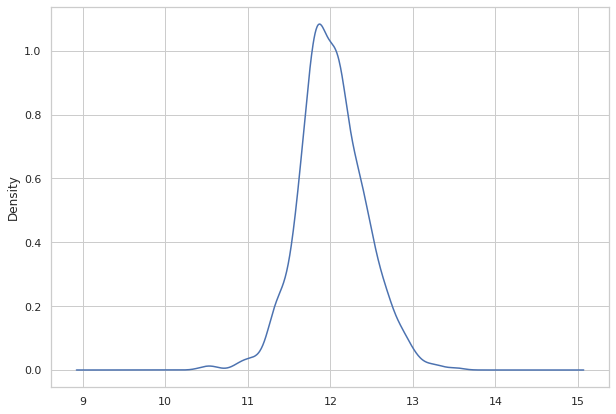

In [ ]:
df_train_num['SalePrice_log']=np.log1p(df_train_num['SalePrice']).plot(kind='kde')

In [ ]:
df_train_num['SalePrice_log']=np.log1p(df_train_num['SalePrice'])

In [ ]:
df_train_num=df_train_num.drop(columns=['SalePrice'])

In [ ]:
df_train_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,MasVnrArea,LotFrontage,1stflrprcnt,BsmtFinPercent,age_constrt,age_remod,SalePrice_log
0,7,7.44,2,548,856,2,8,0,"2,003.00",5.28,65.00,50.06,82.48,19,19,12.25
1,6,7.14,2,460,1262,2,6,1,"1,976.00",0.00,80.00,100.00,77.50,46,46,12.11
2,7,7.49,2,608,920,2,6,1,"2,001.00",5.09,68.00,51.51,52.83,21,20,12.32
3,7,7.45,3,642,756,1,7,1,"1,998.00",0.00,60.00,55.97,28.57,107,52,11.85
4,8,7.70,3,836,1145,2,9,1,"2,000.00",5.86,84.00,52.09,57.21,22,22,12.43


In [ ]:
df_train_num.isnull().sum()

OverallQual        0
GrLivArea          0
GarageCars         0
GarageArea         0
TotalBsmtSF        0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
MasVnrArea         0
LotFrontage        0
1stflrprcnt        0
BsmtFinPercent    37
age_constrt        0
age_remod          0
SalePrice_log      0
dtype: int64

In [ ]:
df_train_cat

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtFinType1,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,SaleCondition,SalePrice
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,Gd,PConc,Gd,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,208500
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,TA,CBlock,Gd,ALQ,Ex,SBrkr,TA,Attchd,RFn,Normal,181500
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,Gd,PConc,Gd,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,223500
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,TA,BrkTil,TA,ALQ,Gd,SBrkr,Gd,Detchd,Unf,Abnorml,140000
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,Gd,PConc,Gd,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,TA,PConc,Gd,Unf,Ex,SBrkr,TA,Attchd,RFn,Normal,175000
1456,RL,Reg,Inside,NWAmes,Norm,1Fam,1Story,Gable,Plywood,TA,CBlock,Gd,ALQ,TA,SBrkr,TA,Attchd,Unf,Normal,210000
1457,RL,Reg,Inside,Crawfor,Norm,1Fam,2Story,Gable,CemntBd,Ex,Stone,TA,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,266500
1458,RL,Reg,Inside,NAmes,Norm,1Fam,1Story,Hip,MetalSd,TA,CBlock,TA,GLQ,Gd,FuseA,Gd,Attchd,Unf,Normal,142125


In [ ]:
df_train_cat.isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
Electrical       0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleCondition    0
SalePrice        0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(sparse=False,dtype=np.int32,drop='first')

In [ ]:
cat_col=df_train_cat.columns.tolist()

In [ ]:
df_train_num=df_train_num.drop(columns=['BsmtFinPercent'])

In [ ]:
df_train_num.shape

(1457, 15)

In [ ]:
df_train_ohe=pd.DataFrame(ohe.fit_transform(df_train_cat[cat_col[:-1]]))

In [ ]:
df_test_ohe=pd.DataFrame(ohe.transform(df_test_cat[cat_col[:-1]]))

In [ ]:
ohe.transform()

(1457, 112)

In [ ]:
df_train_cat.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'Electrical',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [ ]:
df_train_ohe.isnull().sum().sum()

0

In [ ]:
(df_train_num.isnull().sum()).sum()

0

In [ ]:
df_train_new=df_train_num.join(df_train_ohe)

In [ ]:
df_test_new=df_test_num.join(df_test_ohe)

In [ ]:
df_train_new=df_train_new.dropna()

In [ ]:
df_test_new=df_test_num.join(df_test_ohe)

In [ ]:
df_train_new['SalePrice_log']

0      12.25
1      12.11
2      12.32
3      11.85
4      12.43
        ... 
1452   11.88
1453   11.34
1454   12.13
1455   12.07
1456   12.25
Name: SalePrice_log, Length: 1454, dtype: float64

In [ ]:
df_test_ohe=pd.DataFrame(ohe.transform(df_train_cat[cat_col[:-1]]))

In [ ]:
y=df_train_new['SalePrice_log']

In [ ]:
y.shape

(1454,)

In [ ]:
x=df_train_new.drop(columns=['SalePrice_log'])

In [ ]:
x.shape

(1454, 126)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,y_train.shape

((1163, 126), (1163,))

In [ ]:
x_test.shape,y_test.shape

((291, 126), (291,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
x_train_scale=scale.fit_transform(x_train)

In [ ]:
x_test_scale=scale.transform(x_test)

In [ ]:
pd.DataFrame(x_test_scale).head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,-0.81,-1.43,-1.03,-0.87,-0.46,-1.04,-0.96,-0.97,-0.47,0.88,...,-0.27,-0.07,-0.62,-0.68,-0.87,-0.05,-0.09,-0.13,0.47,-0.31
1,-1.53,0.67,-1.03,-0.79,0.12,-1.04,0.91,2.17,-0.87,-0.83,...,-0.27,-0.07,-0.62,-0.68,-0.87,-0.05,-0.09,-0.13,-2.14,-0.31
2,0.64,0.09,0.29,0.04,1.01,0.76,0.29,0.60,1.23,1.47,...,-0.27,-0.07,1.62,-0.68,1.16,-0.05,-0.09,-0.13,0.47,-0.31
3,1.36,0.43,0.29,0.04,1.32,0.76,-0.96,0.60,1.19,1.16,...,-0.27,-0.07,1.62,-0.68,1.16,-0.05,-0.09,-0.13,0.47,-0.31
4,-1.53,-1.62,-1.03,-0.86,-2.54,-1.04,-0.96,-0.97,-0.87,-0.83,...,3.73,-0.07,-0.62,-0.68,-0.87,-0.05,-0.09,-0.13,0.47,-0.31


In [ ]:
x_train=pd.DataFrame(x_train_scale,columns=x.columns)

In [ ]:
x_test=pd.DataFrame(x_test_scale,columns=x.columns)

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
y_train=y_train.reset_index().drop(columns=['index'])

In [ ]:
y_test=y_test.reset_index().drop(columns=['index'])

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
(x_train.isnull().sum()).sum(), (x_test.isnull().sum()).sum()

(0, 0)

In [ ]:
(y_train.isnull().sum()).sum(), (y_test.isnull().sum()).sum()

(0, 0)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [ ]:
col=x_train.columns

In [ ]:
vif=pd.DataFrame(vif)

In [ ]:
vif['col']=col

In [ ]:
vif=vif.rename(columns={0:'VIF Factor'})

In [ ]:
vif_gtr_10=vif[vif['VIF Factor']>10]

In [ ]:
lst_vif_gtr_10=vif_gtr_10['col'].tolist()

In [ ]:
x_train=x_train.drop(columns=lst_vif_gtr_10)

In [ ]:
x_test=x_test.drop(columns=lst_vif_gtr_10)

In [ ]:
df_test_new=df_test_new.drop(columns=lst_vif_gtr_10)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_constant=sm.add_constant(x_train)

In [ ]:
model=sm.OLS(y_train,x_constant)

In [ ]:
lr=model.fit()

In [ ]:
influence=lr.get_influence()


In [ ]:
cooks = influence.cooks_distance

In [ ]:
cook_df=pd.DataFrame({'cook_distance':cooks[0],'p_value':cooks[1]})

In [ ]:
cook_df.head()

,cook_distance,p_value
0,0.00,1.00
1,0.00,1.00
2,0.00,1.00
3,0.00,1.00
4,0.00,1.00


In [ ]:
drop_index=cook_df[cook_df['p_value']<0.05].index.tolist()

In [ ]:
x_train=x_train.drop(index=drop_index)

In [ ]:
y_train=y_train.drop(index=drop_index)

In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
def r2score(test,pred):
  r2=r2_score(test,pred)
  return r2

def rmsescore(test,pred):
  rmse=np.sqrt(mean_squared_error(test,pred))
  return rmse

def result(test,pred):
  print(regr.__class__.__name__)
  print('r2:',r2_score(test,pred))
  print('rmse:',rmsescore(test,pred))

In [ ]:
ridge=Ridge()
lasso=Lasso(alpha=0.01)
elastic=ElasticNet(alpha=0.01)
svr=SVR()
rdf=RandomForestRegressor()
xgb=XGBRegressor()
lgbm=LGBMRegressor()

In [ ]:
for regr in [ridge,lasso,elastic,svr,rdf,xgb,lgbm]:
  regr.fit(x_train,y_train)
  y_pred=regr.predict(x_test)
  result(y_test,y_pred)                      

Ridge
r2: 0.8292310652896139
rmse: 0.16177271230024484
Lasso
r2: 0.8431876963227614
rmse: 0.15502113055984632
ElasticNet
r2: 0.8427074072194742
rmse: 0.15525835058180926
SVR
r2: 0.7283918743675861
rmse: 0.20401975026402633
RandomForestRegressor
r2: 0.846583594609702
rmse: 0.1533333887047737
[06:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
r2: 0.8453310645947154
rmse: 0.1539580424619556
LGBMRegressor
r2: 0.8489741517816718
rmse: 0.15213406656092177
